In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_pickle('Group_1_data_cleaned.pkl')

In [3]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
1,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
2,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
3,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,1
4,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,1
5,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274650 entries, 1 to 311028
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   duration                     274650 non-null  int64   
 1   protocol_type                274650 non-null  category
 2   service                      274650 non-null  category
 3   flag                         274650 non-null  category
 4   src_bytes                    274650 non-null  int64   
 5   dst_bytes                    274650 non-null  int64   
 6   land                         274650 non-null  category
 7   wrong_fragment               274650 non-null  category
 8   urgent                       274650 non-null  category
 9   hot                          274650 non-null  float64 
 10  num_failed_logins            274650 non-null  float64 
 11  logged_in                    274650 non-null  category
 12  num_compromised              274650 non-null

In [5]:
df = pd.get_dummies(df,columns=['protocol_type','service','flag','land','wrong_fragment','urgent','logged_in','root_shell',
                                'su_attempted','num_shells','num_access_files','num_outbound_cmds','is_host_login',
                                'is_guest_login'])

In [6]:
df.head()

,duration,src_bytes,dst_bytes,hot,num_failed_logins,num_compromised,num_root,num_file_creations,count,srv_count,...,num_access_files_0.0,num_access_files_1.0,num_access_files_2.0,num_access_files_3.0,num_access_files_4.0,num_outbound_cmds_0.0,is_host_login_0.0,is_host_login_1.0,is_guest_login_0.0,is_guest_login_1.0
1,0,105,146,0.0,0.0,0.0,0.0,0.0,1,1.0,...,1,0,0,0,0,1,1,0,1,0
2,0,105,146,0.0,0.0,0.0,0.0,0.0,1,1.0,...,1,0,0,0,0,1,1,0,1,0
3,0,105,146,0.0,0.0,0.0,0.0,0.0,2,2.0,...,1,0,0,0,0,1,1,0,1,0
4,0,105,146,0.0,0.0,0.0,0.0,0.0,2,2.0,...,1,0,0,0,0,1,1,0,1,0
5,0,105,146,0.0,0.0,0.0,0.0,0.0,2,2.0,...,1,0,0,0,0,1,1,0,1,0


In [7]:
X = df.iloc[0:].drop('label',axis=1)
y = df[['label']]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [9]:
from sklearn import tree

model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [10]:
y_pred_tree = model.predict(X_test)
y_pred_tree

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

model.score(X_test, y_test)

0.9785765259309963

In [12]:
model.get_n_leaves()

204

In [13]:
model.get_depth()

24

In [14]:
accuracy_score(y_test,y_pred_tree)

0.9785765259309963

In [15]:
max_depth = []
acc_gini = []
acc_entropy = []

for i in range(1, 21):
    model = tree.DecisionTreeClassifier(criterion='gini', max_depth=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_gini.append(model.score(X_test,y_test))

    model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_entropy.append(model.score(X_test,y_test))

    max_depth.append(i)
    
d = pd.DataFrame({'max_depth': max_depth,
                  'acc_gini': acc_gini,
                  'acc_entropy': acc_entropy})
d

,max_depth,acc_gini,acc_entropy
0,1,0.924210,0.924064
1,2,0.940448,0.940361
2,3,0.958522,0.958245
3,4,0.959410,0.959163
4,5,0.969343,0.969008
5,6,0.970741,0.970741
6,7,0.972853,0.971600
7,8,0.975547,0.975198
8,9,0.975955,0.975882
9,10,0.976392,0.975795


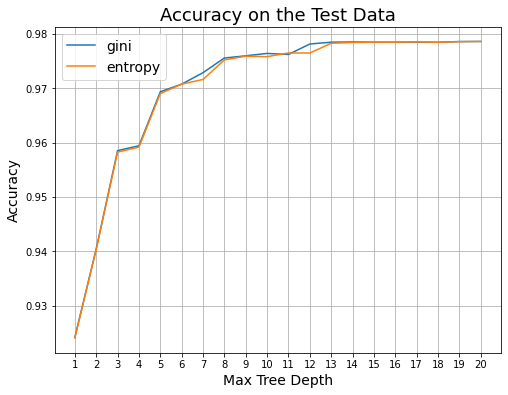

In [16]:
plt.figure(figsize = (8, 6))

plt.plot(d.max_depth, d.acc_gini, label='gini')
plt.plot(d.max_depth, d.acc_entropy, label='entropy')
plt.xlabel('Max Tree Depth', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Accuracy on the Test Data', fontsize=18)
plt.grid()
plt.xticks(max_depth)
plt.legend(fontsize=14);

In [19]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import warnings
warnings.filterwarnings('ignore')
gs = GridSearchCV(estimator=tree.DecisionTreeClassifier(random_state=42), 
                 param_grid={'max_depth': range(1, 21,3),
                             'min_samples_split': range(2, 20, 2),
                             'criterion': ['gini', 'entropy']},
                 cv=5,
                 scoring="recall")

gs.fit(X_train, y_train)

print(gs.best_params_)
print(gs.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2}
0.994023070946148


In [20]:
#taking best parameters for regression tree
hyperparameter_tuned_model= tree.DecisionTreeClassifier(max_depth=10,min_samples_split = 2,
                                                       criterion='gini')

In [21]:
hyperparameter_tuned_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [22]:
hyperparameter_tuned_model.score(X_test,y_test)

0.9763773793746268

In [23]:
#Predicting the value for test data
tuned_pred=hyperparameter_tuned_model.predict(X_test)

In [24]:
accuracy_score(y_test,tuned_pred)

0.9763773793746268